In [1]:
import sys  
sys.path.insert(0, '/Users/mariamilusheva/code/Fandom_Analyser/src')
sys.path.insert(0, '/Users/mariamilusheva/code/Fandom_Analyser')

import fandom_scraper
import extract_data as ext
from fandom_scraper import Fandom
import json
import pprint
import database_utils as utils
from pathlib import Path
from analysis_tools import FandomAnalysisTools as FAT

In [2]:
fandom_name = 'Blood of Zeus (Cartoon)'
fnd, fan, p = ext.make_fandom_vars(fandom_name)

INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
INFO:fandom:https://archiveofourown.org/tags/Blood of Zeus (Cartoon)/works?page=1
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"
INFO:analysis:Init analyzer.


In [3]:
ext.extract_works_metadata(fnd, p)

INFO:fandom:Fandom contains 136 works in 7 pages.
INFO:fandom:Currently fetching titles page: 1
INFO:fandom:Currently fetching titles page: 2
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"
INFO:fandom:Currently fetching titles page: 3
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"
INFO:fandom:Currently fetching titles page: 4
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClose

In [7]:
ext.get_chars_ships_tags_variants(fan, fnd, fandom_name)

Scraping characters from fandom page. We do this to ensure all versions of a character name count as the same character.
Beep
Oops, we sent too many requests to Ao3! Waiting 60 secs and re-trying...


KeyboardInterrupt: 

In [3]:
ext.process_data_files(fandom_name)

INFO:extract:Processing character names to minimise duplication.
INFO:dedup:Duplicate items found and will be deleted: ['reader', 'reader']
INFO:dedup:Duplicate items found and will be deleted: []
INFO:extract:Processing tag names to minimise duplication.
INFO:dedup:Duplicate items found and will be deleted: []
INFO:extract:Processing relationships to minimise duplication.
INFO:dedup:Duplicate items found and will be deleted: []
INFO:dedup:Duplicate items found and will be deleted: []


In [4]:
with open("/Users/mariamilusheva/code/Fandom_Analyser/fandom_extracted_data/" + fandom_name + "/raw/works.json") as f:
    d = json.load(f)
    ext.process_works_file(d, fandom_name)
    fan.prepare_analytics_folders()

In [5]:
from src.params.folder_params import *

f = open(ROOT_DIR + FILES_ROOT + fandom_name + "/processed/works.json")
d = json.load(f)     

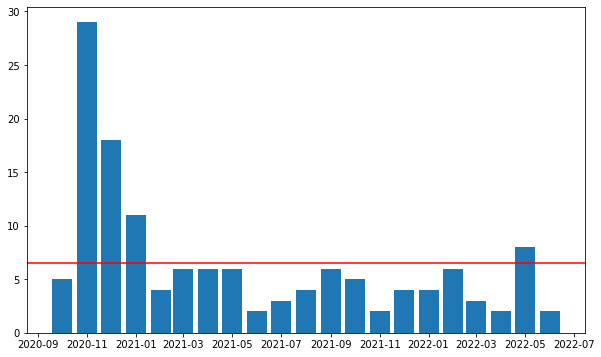

In [6]:
fan.plot_new_works_count_by_month(d)

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 720x432 with 1 Axes>

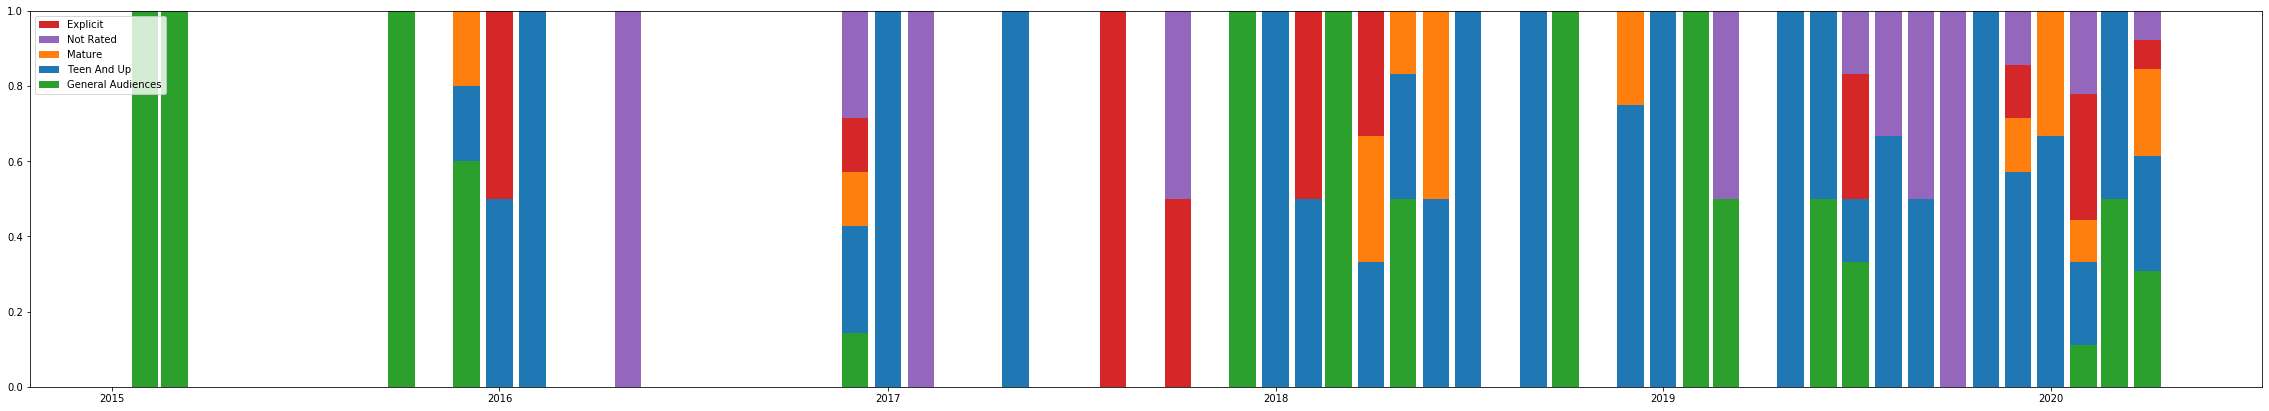

In [9]:
fan.plot_new_works_count_by_month_ratings(d)

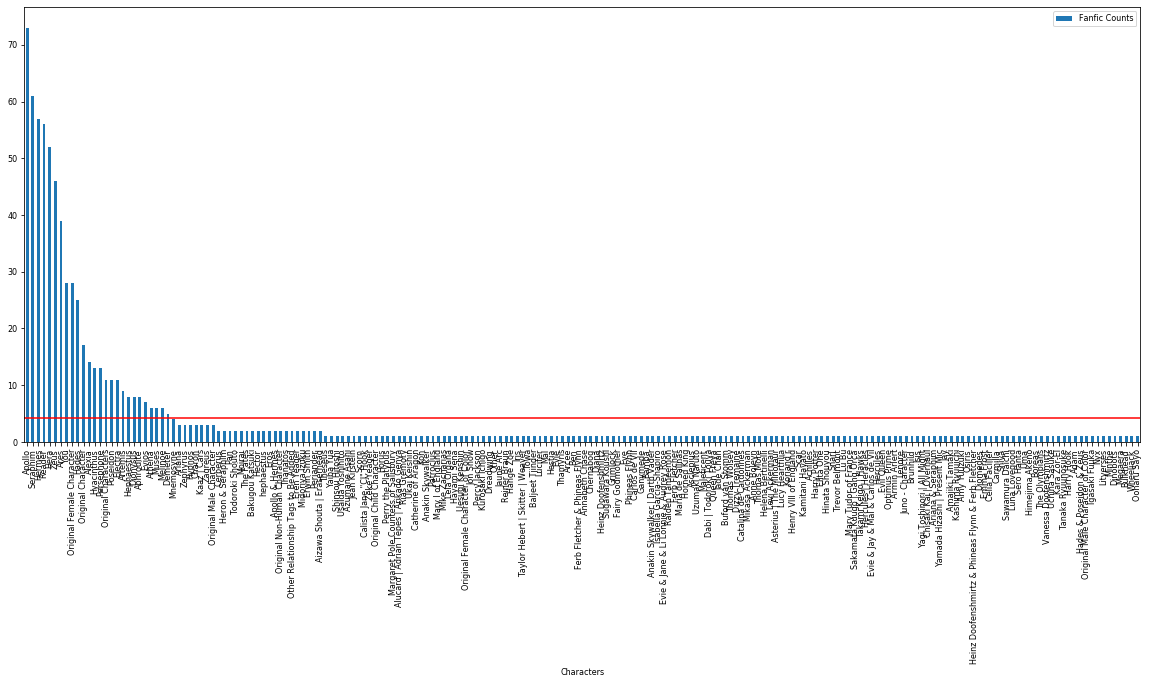

In [6]:
fan.plot_works_count_by_character(d)

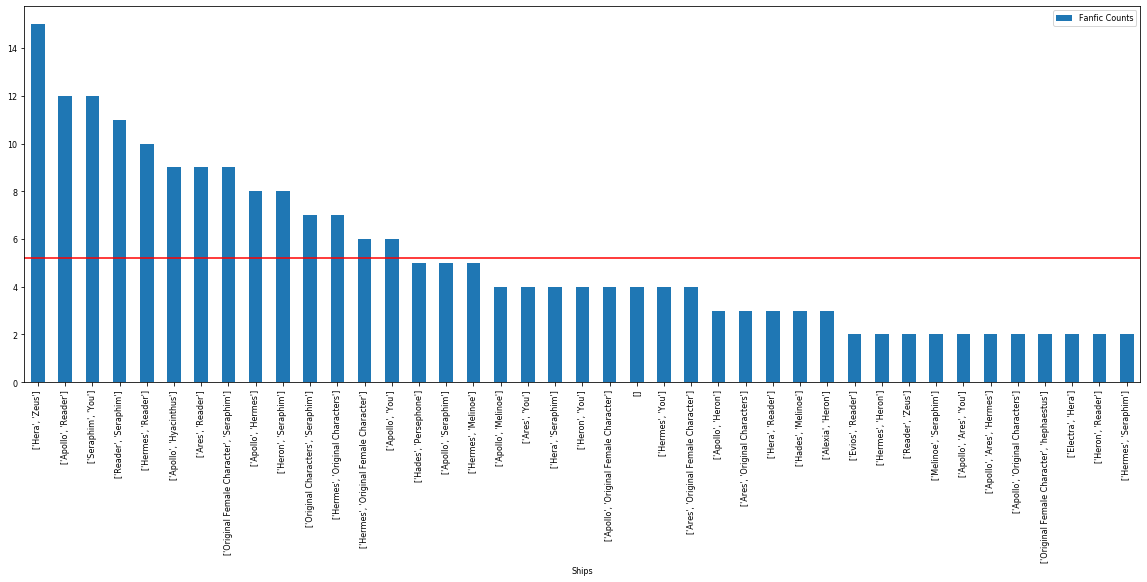

In [7]:
fan.plot_works_count_by_ship(d)

FileNotFoundError: [Errno 2] No such file or directory: 'fandom_extracted_data/Blood of Zeus (Cartoon)/plots/plot_average_hits_character.png'

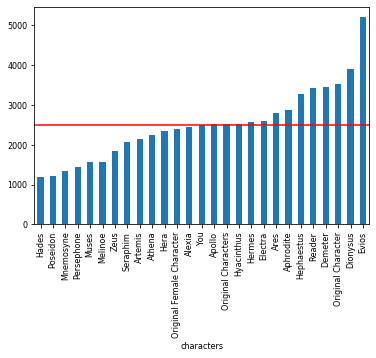

In [8]:
fan.plot_average_hits_character(d)

In [ ]:
fan.plot_works_count_by_rating(d)

In [ ]:
fan.plot_chars_ratings(d)

In [ ]:
fan.plot_works_count_by_tag(d)

In [ ]:
fan.plot_average_words_character(d)

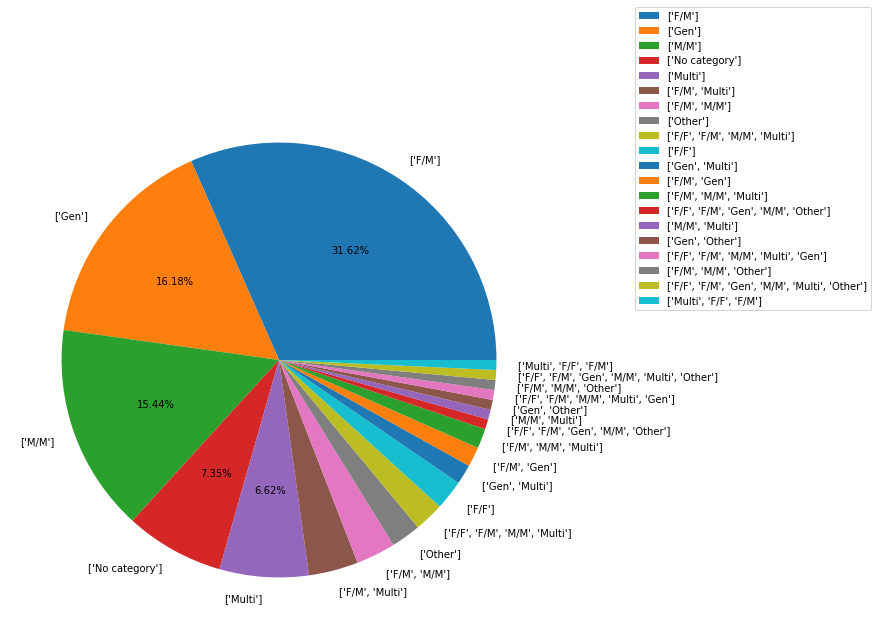

In [12]:
fan.plot_works_count_by_category(d)

In [11]:
fan.build_rel_dictionary(d)

ValueError: list.remove(x): x not in list

In [ ]:
# plot_new_char_works_count_by_month(d, "Evelynn")
# author_champ_dedication_score(d, "Qiyana")
# fan.plot_champs_by_dedication_score(d)
# fan.main_character_ratio(d)
# fan.detect_main_characters()
# plot_char_common_appearances(d, 'Vladimir')
# plot_char_tags(d, 'Jhin')
# plot_char_shipping(d, "Fiddlesticks")
# fan.plot_chars_everything(d)
# fan.champs_without_explicit(d)
# plot_average_hits_ships_character(d, 'Evelynn')